In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Bankaladesh_2021

In [5]:
Bankaladesh_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
6,6,Afif Hossain (BAN),6,6,2,139,45,34.75,123,113.00,...,11,0,-,-,11.00,-,0,0,4,0
106,106,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,20.00,...,131,5,3/28,26.20,6.77,23.2,0,0,0,0
153,153,Liton Das (BAN),11,11,0,256,102,23.27,356,71.91,...,-,-,-,-,-,-,-,-,10,0
165,165,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,72.72,...,105,2,2/42,52.50,4.56,69.0,0,0,0,0
167,167,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,81.59,...,57,2,2/45,28.50,4.68,36.5,0,0,5,0
182,182,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,56.89,...,297,15,4/25,19.80,3.53,33.6,2,0,7,0
192,192,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,68.47,...,12,0,-,-,6.00,-,0,0,0,0
195,195,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,50.00,...,-,-,-,-,-,-,-,-,0,0
198,198,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,84.70,...,307,10,3/51,30.70,6.35,29.0,0,0,1,0
202,202,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,65.74,...,55,0,-,-,6.34,-,0,0,3,0


In [6]:
Bankaladesh_2021=Bankaladesh_2021.reset_index()

In [7]:
Bankaladesh_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,6,Afif Hossain (BAN),6,6,2,139,45,34.75,123,...,11,0,-,-,11.00,-,0,0,4,0
1,106,106,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,...,131,5,3/28,26.20,6.77,23.2,0,0,0,0
2,153,153,Liton Das (BAN),11,11,0,256,102,23.27,356,...,-,-,-,-,-,-,-,-,10,0
3,165,165,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,...,105,2,2/42,52.50,4.56,69.0,0,0,0,0
4,167,167,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,...,57,2,2/45,28.50,4.68,36.5,0,0,5,0
5,182,182,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,...,297,15,4/25,19.80,3.53,33.6,2,0,7,0
6,192,192,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,...,12,0,-,-,6.00,-,0,0,0,0
7,195,195,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,...,-,-,-,-,-,-,-,-,0,0
8,198,198,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,...,307,10,3/51,30.70,6.35,29.0,0,0,1,0
9,202,202,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,...,55,0,-,-,6.34,-,0,0,3,0


In [8]:
Bankaladesh_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Bankaladesh_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),6,6,2,139,45,34.75,123,113.00,0,...,11,0,-,-,11.00,-,0,0,4,0
1,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,20.00,0,...,131,5,3/28,26.20,6.77,23.2,0,0,0,0
2,Liton Das (BAN),11,11,0,256,102,23.27,356,71.91,1,...,-,-,-,-,-,-,-,-,10,0
3,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,72.72,0,...,105,2,2/42,52.50,4.56,69.0,0,0,0,0
4,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,81.59,0,...,57,2,2/45,28.50,4.68,36.5,0,0,5,0
5,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,56.89,0,...,297,15,4/25,19.80,3.53,33.6,2,0,7,0
6,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,68.47,0,...,12,0,-,-,6.00,-,0,0,0,0
7,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,-,0,0
8,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,84.70,0,...,307,10,3/51,30.70,6.35,29.0,0,0,1,0
9,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,65.74,0,...,55,0,-,-,6.34,-,0,0,3,0


In [10]:
Bankaladesh_2021_players =Bankaladesh_2021.copy()

In [11]:
Bankaladesh_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Bankaladesh_2021_players.HS=Bankaladesh_2021_players.HS.str.extract('(\d+)')
Bankaladesh_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Bankaladesh_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,6,2,139,45,34.75,123,113.00,0,0,...,11,0,-,-,11.00,-,0,0,4,0
1,3,1,0,1,1,1.00,5,20.00,0,0,...,131,5,3/28,26.20,6.77,23.2,0,0,0,0
2,11,11,0,256,102,23.27,356,71.91,1,0,...,-,-,-,-,-,-,-,-,10,0
3,3,3,0,24,14,8.00,33,72.72,0,0,...,105,2,2/42,52.50,4.56,69.0,0,0,0,0
4,12,11,3,399,76,49.87,489,81.59,0,4,...,57,2,2/45,28.50,4.68,36.5,0,0,5,0
5,11,6,0,33,26,5.50,58,56.89,0,0,...,297,15,4/25,19.80,3.53,33.6,2,0,7,0
6,7,7,1,139,73,23.16,203,68.47,0,1,...,12,0,-,-,6.00,-,0,0,0,0
7,1,1,0,1,1,1.00,2,50.00,0,0,...,-,-,-,-,-,-,-,-,0,0
8,7,6,5,72,28,72.00,85,84.70,0,0,...,307,10,3/51,30.70,6.35,29.0,0,0,1,0
9,5,4,0,71,51,17.75,108,65.74,0,1,...,55,0,-,-,6.34,-,0,0,3,0


In [14]:
Bankaladesh_2021_players.replace("-",0,inplace=True)

In [15]:
Bankaladesh_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Bankaladesh_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Bankaladesh_2021_players),columns=Bankaladesh_2021_players.columns)
Bankaladesh_2021_players_scaled.shape
Bankaladesh_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.181486,0.202835,0.725476,0.114813,0.038123,0.682916,-0.208170,1.622703,-0.420084,-0.551677,...,-0.573890,-0.805781,-0.758887,-0.985403,2.408316,-0.977679,-0.466252,-0.229416,0.466832,-0.229416
1,-1.019112,-1.245984,-0.725476,-0.814465,-1.080146,-0.930723,-0.826912,-1.607870,-0.420084,-0.551677,...,-0.027328,0.065334,0.075055,0.537083,0.917000,0.142151,-0.466252,-0.229416,-0.820980,-0.229416
2,1.214558,1.651654,-0.725476,0.902679,1.486789,0.134040,1.013584,0.195345,2.380476,-0.551677,...,-0.573890,-0.885634,-0.758887,-0.985403,-1.469810,-0.977679,-0.466252,-0.229416,2.398551,-0.229416
3,-1.019112,-0.666457,-0.725476,-0.659586,-0.749748,-0.596042,-0.680092,0.223483,-0.420084,-0.551677,...,-0.027328,-0.123408,-0.425310,2.065381,0.137850,2.352848,-0.466252,-0.229416,-0.820980,-0.229416
4,1.493767,1.651654,1.450953,1.865627,0.825994,1.405826,1.710979,0.531603,-0.420084,2.600764,...,-0.573890,-0.471854,-0.425310,0.670737,0.180157,0.784122,-0.466252,-0.229416,0.788785,-0.229416


In [17]:
Bankaladesh_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.110223e-16,8.049117e-17,-1.110223e-17,5.551115e-18,0.000000,1.221245e-16,3.885781e-17,-1.554312e-16,5.551115e-18,-1.110223e-17,...,1.110223e-17,4.440892e-17,-3.330669e-17,3.330669e-17,3.913536e-16,3.330669e-17,0.000000,-9.159340e-17,4.302114e-17,-3.608225e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.577529e+00,-1.245984e+00,-7.254763e-01,-8.144652e-01,-1.080146,-9.785343e-01,-8.426429e-01,-1.806568e+00,-4.200840e-01,-5.516773e-01,...,-5.738905e-01,-8.856336e-01,-7.588869e-01,-9.854035e-01,-1.469810e+00,-9.776785e-01,-0.466252,-2.294157e-01,-8.209804e-01,-2.294157e-01
25%,-1.019112e+00,-6.664567e-01,-7.254763e-01,-7.067228e-01,-0.864117,-7.872883e-01,-6.866465e-01,-3.862446e-01,-4.200840e-01,-5.516773e-01,...,-5.738905e-01,-8.638557e-01,-7.588869e-01,-9.854035e-01,-5.364153e-01,-9.776785e-01,-0.466252,-2.294157e-01,-8.209804e-01,-2.294157e-01
50%,-4.188131e-02,-3.766929e-01,-7.254763e-01,-5.350084e-01,-0.343105,-4.368299e-01,-5.175411e-01,1.076337e-01,-4.200840e-01,-5.516773e-01,...,-5.738905e-01,-4.210389e-01,-4.253102e-01,9.893259e-02,2.365657e-01,2.000729e-01,-0.466252,-2.294157e-01,-4.990273e-01,-2.294157e-01
75%,9.353492e-01,6.374803e-01,7.254763e-01,3.117796e-01,0.768810,7.296515e-01,4.118830e-01,4.206172e-01,-4.200840e-01,2.364331e-01,...,-2.732812e-02,5.244838e-01,5.337226e-01,7.026974e-01,5.397646e-01,6.791378e-01,-0.466252,-2.294157e-01,5.473203e-01,-2.294157e-01
max,1.493767e+00,1.941417e+00,2.901905e+00,2.303331e+00,2.071339,2.463895e+00,2.293016e+00,1.705378e+00,2.380476e+00,2.600764e+00,...,2.705484e+00,2.141491e+00,2.243303e+00,2.065381e+00,2.408316e+00,2.352848e+00,3.263767,4.358899e+00,2.398551e+00,4.358899e+00


In [18]:
X =  Bankaladesh_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.18148567,  0.20283466,  0.72547625,  0.114813  ,  0.0381228 ,
         0.68291572, -0.20817003,  1.6227033 , -0.42008403, -0.55167728,
        -0.77777778, -0.04442894,  0.4079764 , -2.75904727, -0.18148567,
        -0.74855741, -0.79348843, -0.57389046, -0.80578135, -0.75888689,
        -0.98540348,  2.40831594, -0.97767853, -0.4662524 , -0.22941573,
         0.46683199, -0.22941573],
       [-1.01911185, -1.24598431, -0.72547625, -0.81446523, -1.08014588,
        -0.93072279, -0.82691217, -1.60787045, -0.42008403, -0.55167728,
        -0.77777778, -0.77144803, -0.57116696, -1.41284221, -1.01911185,
        -0.19407044, -0.1985764 , -0.02732812,  0.06533362,  0.07505475,
         0.53708339,  0.91700041,  0.14215074, -0.4662524 , -0.22941573,
        -0.8209804 , -0.22941573],
       [ 1.21455796,  1.65165363, -0.72547625,  0.90267933,  1.48678903,
         0.13403957,  1.01358353,  0.1953455 ,  2.38047614, -0.55167728,
         2.55555556,  1.40960922, -0.57116696, -0.7801

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Bankaladesh_2021_players_scaled))

False

In [23]:
Bankaladesh_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.181486,0.202835,0.725476,0.114813,0.038123,0.682916,-0.208170,1.622703,-0.420084,-0.551677,...,-0.573890,-0.805781,-0.758887,-0.985403,2.408316,-0.977679,-0.466252,-0.229416,0.466832,-0.229416
1,-1.019112,-1.245984,-0.725476,-0.814465,-1.080146,-0.930723,-0.826912,-1.607870,-0.420084,-0.551677,...,-0.027328,0.065334,0.075055,0.537083,0.917000,0.142151,-0.466252,-0.229416,-0.820980,-0.229416
2,1.214558,1.651654,-0.725476,0.902679,1.486789,0.134040,1.013584,0.195345,2.380476,-0.551677,...,-0.573890,-0.885634,-0.758887,-0.985403,-1.469810,-0.977679,-0.466252,-0.229416,2.398551,-0.229416
3,-1.019112,-0.666457,-0.725476,-0.659586,-0.749748,-0.596042,-0.680092,0.223483,-0.420084,-0.551677,...,-0.027328,-0.123408,-0.425310,2.065381,0.137850,2.352848,-0.466252,-0.229416,-0.820980,-0.229416
4,1.493767,1.651654,1.450953,1.865627,0.825994,1.405826,1.710979,0.531603,-0.420084,2.600764,...,-0.573890,-0.471854,-0.425310,0.670737,0.180157,0.784122,-0.466252,-0.229416,0.788785,-0.229416
5,1.214558,0.202835,-0.725476,-0.598980,-0.444766,-0.715571,-0.549003,-0.326410,-0.420084,-0.551677,...,2.705484,1.270376,1.742938,0.165178,-0.225284,0.644143,3.263767,-0.229416,1.432691,-0.229416
6,0.097723,0.492598,0.000000,0.114813,0.749748,0.128780,0.211316,0.075849,-0.420084,0.236433,...,-0.573890,-0.798522,-0.758887,-0.985403,0.645532,-0.977679,-0.466252,-0.229416,-0.820980,-0.229416
7,-1.577529,-1.245984,-0.725476,-0.814465,-1.080146,-0.930723,-0.842643,-0.565750,-0.420084,-0.551677,...,-0.573890,-0.885634,-0.758887,-0.985403,-1.469810,-0.977679,-0.466252,-0.229416,-0.820980,-0.229416
8,0.097723,0.202835,2.901905,-0.336358,-0.393936,2.463895,-0.407426,0.639636,-0.420084,-0.551677,...,-0.573890,1.342969,0.908996,0.798579,0.768927,0.422108,-0.466252,-0.229416,-0.499027,-0.229416
9,-0.460694,-0.376693,-0.725476,-0.343092,0.190614,-0.129880,-0.286824,-0.018984,-0.420084,0.236433,...,-0.573890,-0.486373,-0.758887,-0.985403,0.765401,-0.977679,-0.466252,-0.229416,0.144879,-0.229416


In [24]:
np.all(np.isfinite(Bankaladesh_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


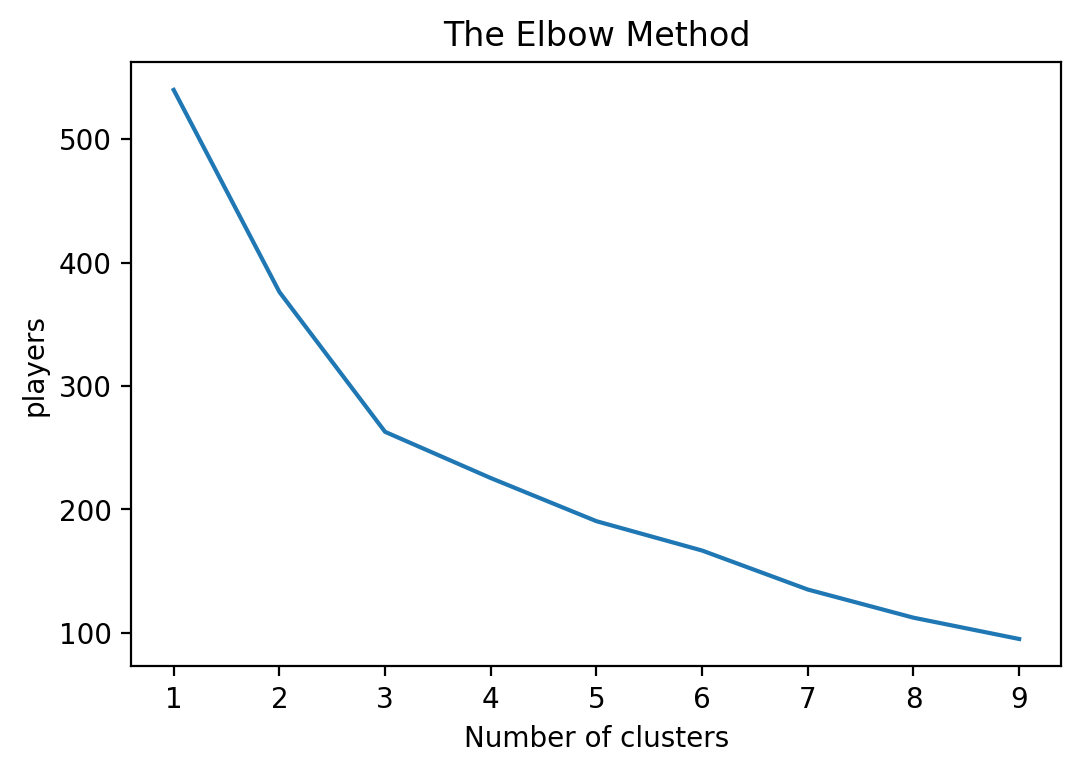

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[ 1.21455796,  1.57921268,  0.18136906,  1.74778381,  1.53126562,
         1.05273776,  1.73719723,  0.36755592,  1.6803361 ,  1.41859873,
         0.61111111,  1.65194892,  1.30552447, -0.00269241,  1.21455796,
        -0.81786829, -0.7272963 , -0.57389046, -0.78218865, -0.67549273,
        -0.5713684 , -1.05731804, -0.53722844, -0.4662524 , -0.22941573,
         1.59366783,  0.91766294],
       [-0.71663573, -0.56986879, -0.12091271, -0.49460497, -0.42358662,
        -0.22821231, -0.52059985,  0.13050244, -0.42008403, -0.42032555,
        -0.5       , -0.46852341, -0.29918269, -0.16872437, -0.71663573,
        -0.30958856, -0.36800648, -0.43724988, -0.2909766 , -0.3558151 ,
         0.03191218,  0.33616297, -0.04891208, -0.31083494, -0.22941573,
        -0.57951557, -0.22941573],
       [ 0.93534923,  0.13039371,  0.18136906, -0.26396889, -0.26050577,
        -0.36810083, -0.17539767, -0.75906325, -0.42008403, -0.15762208,
         0.88888889, -0.24637869, -0.4079764 ,  0.5088

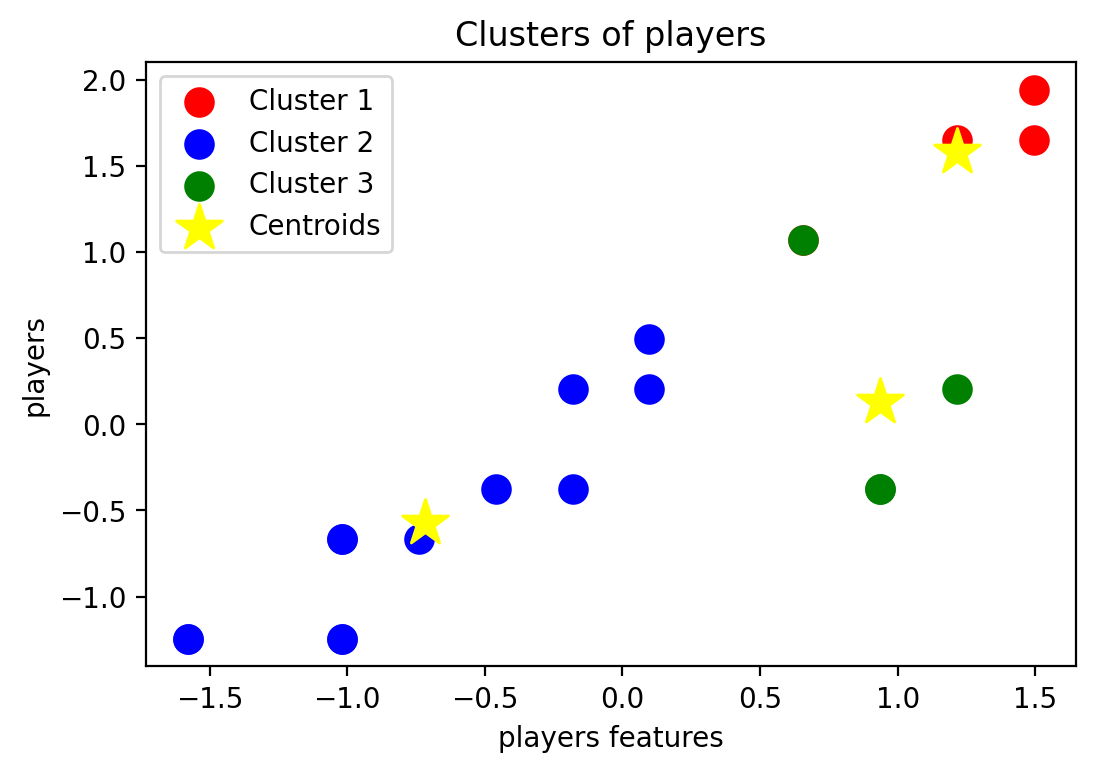

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Bankaladesh_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),6,6,2,139,45,34.75,123,113.00,0,...,11,0,-,-,11.00,-,0,0,4,0
1,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,20.00,0,...,131,5,3/28,26.20,6.77,23.2,0,0,0,0
2,Liton Das (BAN),11,11,0,256,102,23.27,356,71.91,1,...,-,-,-,-,-,-,-,-,10,0
3,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,72.72,0,...,105,2,2/42,52.50,4.56,69.0,0,0,0,0
4,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,81.59,0,...,57,2,2/45,28.50,4.68,36.5,0,0,5,0
5,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,56.89,0,...,297,15,4/25,19.80,3.53,33.6,2,0,7,0
6,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,68.47,0,...,12,0,-,-,6.00,-,0,0,0,0
7,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,-,0,0
8,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,84.70,0,...,307,10,3/51,30.70,6.35,29.0,0,0,1,0
9,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,65.74,0,...,55,0,-,-,6.34,-,0,0,3,0


In [31]:
Bankaladesh_2021["cluster"] = y_kmeans

In [32]:
Bankaladesh_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Afif Hossain (BAN),6,6,2,139,45,34.75,123,113.00,0,...,0,-,-,11.00,-,0,0,4,0,1
1,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,20.00,0,...,5,3/28,26.20,6.77,23.2,0,0,0,0,1
2,Liton Das (BAN),11,11,0,256,102,23.27,356,71.91,1,...,-,-,-,-,-,-,-,10,0,0
3,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,72.72,0,...,2,2/42,52.50,4.56,69.0,0,0,0,0,1
4,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,81.59,0,...,2,2/45,28.50,4.68,36.5,0,0,5,0,0
5,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,56.89,0,...,15,4/25,19.80,3.53,33.6,2,0,7,0,2
6,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,68.47,0,...,0,-,-,6.00,-,0,0,0,0,1
7,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,0,0,1
8,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,84.70,0,...,10,3/51,30.70,6.35,29.0,0,0,1,0,1
9,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,65.74,0,...,0,-,-,6.34,-,0,0,3,0,1


In [33]:
Bankaladesh_2021['cluster'].value_counts()

1    12
0     4
2     4
Name: cluster, dtype: int64

In [34]:
Bankaladesh_Cluster_2021 = np.array([4,12,4])

In [35]:
Bankaladesh_Cluster_2021

array([ 4, 12,  4])

In [36]:
%store Bankaladesh_Cluster_2021

Stored 'Bankaladesh_Cluster_2021' (ndarray)


In [37]:
Bankaladesh_2021_players_scaled.insert(0, 'Player', Bankaladesh_2021.Player)

In [38]:
Bankaladesh_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),-0.181486,0.202835,0.725476,0.114813,0.038123,0.682916,-0.208170,1.622703,-0.420084,...,-0.573890,-0.805781,-0.758887,-0.985403,2.408316,-0.977679,-0.466252,-0.229416,0.466832,-0.229416
1,Hasan Mahmud (BAN),-1.019112,-1.245984,-0.725476,-0.814465,-1.080146,-0.930723,-0.826912,-1.607870,-0.420084,...,-0.027328,0.065334,0.075055,0.537083,0.917000,0.142151,-0.466252,-0.229416,-0.820980,-0.229416
2,Liton Das (BAN),1.214558,1.651654,-0.725476,0.902679,1.486789,0.134040,1.013584,0.195345,2.380476,...,-0.573890,-0.885634,-0.758887,-0.985403,-1.469810,-0.977679,-0.466252,-0.229416,2.398551,-0.229416
3,Mahedi Hasan (BAN),-1.019112,-0.666457,-0.725476,-0.659586,-0.749748,-0.596042,-0.680092,0.223483,-0.420084,...,-0.027328,-0.123408,-0.425310,2.065381,0.137850,2.352848,-0.466252,-0.229416,-0.820980,-0.229416
4,Mahmudullah (BAN),1.493767,1.651654,1.450953,1.865627,0.825994,1.405826,1.710979,0.531603,-0.420084,...,-0.573890,-0.471854,-0.425310,0.670737,0.180157,0.784122,-0.466252,-0.229416,0.788785,-0.229416
5,Mehidy Hasan Miraz (BAN),1.214558,0.202835,-0.725476,-0.598980,-0.444766,-0.715571,-0.549003,-0.326410,-0.420084,...,2.705484,1.270376,1.742938,0.165178,-0.225284,0.644143,3.263767,-0.229416,1.432691,-0.229416
6,Mohammad Mithun (BAN),0.097723,0.492598,0.000000,0.114813,0.749748,0.128780,0.211316,0.075849,-0.420084,...,-0.573890,-0.798522,-0.758887,-0.985403,0.645532,-0.977679,-0.466252,-0.229416,-0.820980,-0.229416
7,Mohammad Naim (BAN),-1.577529,-1.245984,-0.725476,-0.814465,-1.080146,-0.930723,-0.842643,-0.565750,-0.420084,...,-0.573890,-0.885634,-0.758887,-0.985403,-1.469810,-0.977679,-0.466252,-0.229416,-0.820980,-0.229416
8,Mohammad Saifuddin (BAN),0.097723,0.202835,2.901905,-0.336358,-0.393936,2.463895,-0.407426,0.639636,-0.420084,...,-0.573890,1.342969,0.908996,0.798579,0.768927,0.422108,-0.466252,-0.229416,-0.499027,-0.229416
9,Mosaddek Hossain (BAN),-0.460694,-0.376693,-0.725476,-0.343092,0.190614,-0.129880,-0.286824,-0.018984,-0.420084,...,-0.573890,-0.486373,-0.758887,-0.985403,0.765401,-0.977679,-0.466252,-0.229416,0.144879,-0.229416


In [39]:
Bankaladesh_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Afif Hossain (BAN),0.682916,-0.985403
1,Hasan Mahmud (BAN),-0.930723,0.537083
2,Liton Das (BAN),0.134040,-0.985403
3,Mahedi Hasan (BAN),-0.596042,2.065381
4,Mahmudullah (BAN),1.405826,0.670737
5,Mehidy Hasan Miraz (BAN),-0.715571,0.165178
6,Mohammad Mithun (BAN),0.128780,-0.985403
7,Mohammad Naim (BAN),-0.930723,-0.985403
8,Mohammad Saifuddin (BAN),2.463895,0.798579
9,Mosaddek Hossain (BAN),-0.129880,-0.985403


In [40]:
Bankaladesh_2021_Ave=Bankaladesh_2021_players_scaled.mean()

In [41]:
Bankaladesh_2021_Ave

Mat_x          -1.110223e-16
Inns_x          8.049117e-17
NO             -1.110223e-17
Runs_x          5.551115e-18
HS              0.000000e+00
Ave_x           1.221245e-16
BF              3.885781e-17
SR_x           -1.554312e-16
100             5.551115e-18
50             -1.110223e-17
0               6.661338e-17
4s             -3.885781e-17
6s              0.000000e+00
Unnamed: 0_y    8.881784e-17
Mat_y          -1.110223e-16
Inns_y         -2.220446e-17
Overs           8.881784e-17
Mdns            1.110223e-17
Runs_y          4.440892e-17
Wkts           -3.330669e-17
Ave_y           3.330669e-17
Econ            3.913536e-16
SR_y            3.330669e-17
4               0.000000e+00
5              -9.159340e-17
Ct              4.302114e-17
St             -3.608225e-17
dtype: float64

In [42]:
Bankaladesh_Ave_2021 =Bankaladesh_2021_Ave[['Ave_x','Ave_y']]

In [43]:
Bankaladesh_Ave_2021

Ave_x    1.221245e-16
Ave_y    3.330669e-17
dtype: float64

In [44]:
Bankaladesh_Ave_2021 = np.array([Bankaladesh_Ave_2021.Ave_x, Bankaladesh_Ave_2021.Ave_y])

In [45]:
Bankaladesh_Ave_2021

array([1.22124533e-16, 3.33066907e-17])

In [46]:
%store Bankaladesh_Ave_2021

Stored 'Bankaladesh_Ave_2021' (ndarray)


In [47]:
Bankaladesh_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Afif Hossain (BAN),6,6,2,139,45,34.75,123,113.00,0,...,0,-,-,11.00,-,0,0,4,0,1
1,Hasan Mahmud (BAN),3,1,0,1,1,1.00,5,20.00,0,...,5,3/28,26.20,6.77,23.2,0,0,0,0,1
2,Liton Das (BAN),11,11,0,256,102,23.27,356,71.91,1,...,-,-,-,-,-,-,-,10,0,0
3,Mahedi Hasan (BAN),3,3,0,24,14,8.00,33,72.72,0,...,2,2/42,52.50,4.56,69.0,0,0,0,0,1
4,Mahmudullah (BAN),12,11,3,399,76*,49.87,489,81.59,0,...,2,2/45,28.50,4.68,36.5,0,0,5,0,0
5,Mehidy Hasan Miraz (BAN),11,6,0,33,26,5.50,58,56.89,0,...,15,4/25,19.80,3.53,33.6,2,0,7,0,2
6,Mohammad Mithun (BAN),7,7,1,139,73*,23.16,203,68.47,0,...,0,-,-,6.00,-,0,0,0,0,1
7,Mohammad Naim (BAN),1,1,0,1,1,1.00,2,50.00,0,...,-,-,-,-,-,-,-,0,0,1
8,Mohammad Saifuddin (BAN),7,6,5,72,28*,72.00,85,84.70,0,...,10,3/51,30.70,6.35,29.0,0,0,1,0,1
9,Mosaddek Hossain (BAN),5,4,0,71,51,17.75,108,65.74,0,...,0,-,-,6.34,-,0,0,3,0,1
